<a href="https://colab.research.google.com/github/zhangwellington/zhangwellington/blob/main/Estat%C3%ADstica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import seaborn as sns

In [44]:
dados=pd.read_csv('/content/drive/MyDrive/Arquivos Estatística Python/dados.csv')

In [45]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


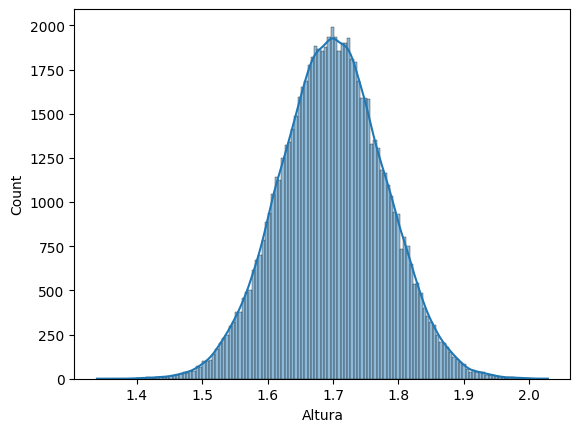

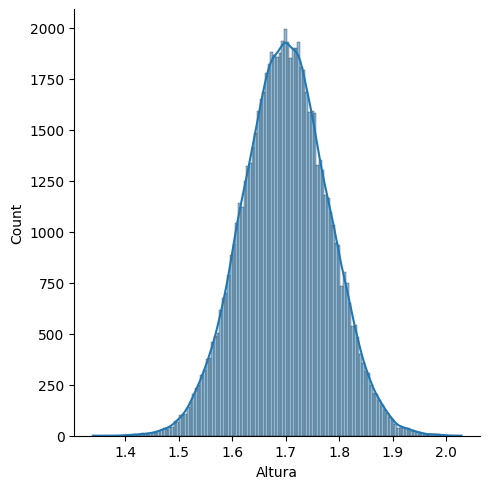

In [46]:
sns.histplot(dados.Altura,kde=True)
sns.displot(dados.Altura,kde=True)

<Axes: >

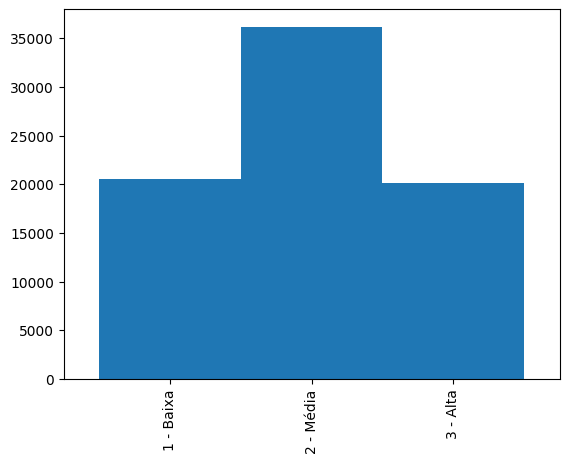

In [47]:
dist_freq_altura.Frequência.plot.bar(width=1)

# **Exercícios Distribuição Binomial**
1) Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [48]:
from scipy.stats import binom
k=2   #queremos 2 coroas
n=4   #4 lançamentos
p=0.5 #50% de chance de ser cara
probabilidade=binom.pmf(k,n,p)
probabilidade

0.375

2) Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [49]:
p=1/6 #chance de cair número 5
n=10    #10 lançamentos
k=2     #P(k>=3)=1-P(k<3)=1-P(k<2)
probabilidade=1-binom.cdf(k,n,p)
probabilidade

0.22477320212874052

3) Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se
sabe que a proporção de participantes do sexo feminino foi de 60%. O total de equipes, com 12 integrantes, inscritas na gincana
deste ano é de 30. Com as informações acima responda: Quantas equipes deverão ser formadas por 8 mulheres?

In [50]:
k=8   #queremos 8 mulheres
n=12   #12 integrantes
p=0.6 #60% de chance de ser mulher
probabilidade=binom.pmf(k,n,p)
probabilidade
equipes=30*probabilidade
equipes

6.3852281856

4) Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [51]:
k=2   #queremos 2 filhos com olhos azuis
n=3   #3 filhos
p=0.22 #22% de chance de ter olho azul
probabilidade=binom.pmf(k,n,p)
probabilidade
familias=50*probabilidade
familias

5.662799999999996

# Estimação
1) Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [52]:
from scipy.stats import norm
import math
n=50
sigma_x=6
sigma_xbarra=sigma_x/math.sqrt(n)
probabilidade=0.95/2+0.5
z=norm.ppf(probabilidade)
e=z*sigma_xbarra
e


1.6630845892196133

2) Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [53]:
n=1976
mi_x=28
sigma_x=11
sigma_xbarra=sigma_x/math.sqrt(n)
norm.interval(confidence=0.9, loc=mi_x, scale=sigma_xbarra)


(27.592969951356466, 28.407030048643534)

3) O valor do gasto médio dos clientes de uma loja de conveniência é de R\$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [54]:
mi_x=45.5
sigma_x=15
alpha=0.1
z=norm.ppf(1-alpha/2)
e=0.1*45.50
n=(z*sigma_x/e)**2
n

29.40452975106716

4) Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [55]:
N=2000
s=0.480
e=0.3
alpha=0.05
z=norm.ppf(1-alpha/2)
n=(z**2*s**2*N)/(z**2*s**2+e**2*(N-1))
math.ceil(n)


10

# Teste de Hipóteses
1) Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma distribuição normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

In [56]:
mi=500
x_barra=485
sigma=20
alfa=0.05
n=30
z=(x_barra-mi)/(sigma/math.sqrt(n))
print(z)
z_alfa=norm.ppf(alfa/2)
print(z_alfa)
z_alfa<=z

-4.107919181288746
-1.9599639845400545


False

2) Considere novamente os dados do exercício anterior. Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g e marque a alternativa que indica o p-valor do teste aplicado (considere somente 5 casas decimais).

In [57]:
p_valor=2*norm.cdf(z)
p_valor

3.992397476901338e-05